# Classification Performance Metrics

Confusion Metix Basics

It is a measure of the overall classification performance of a machine learning model interpreted as the mean value of sensitivity for all possible values of specificity.

Accuracy Paradox

Any classifier dealing with imbalanced classes has to confront the issue of the accuracy paradox.

Imbalanced classes will always result in distroted accuracy reflecting better performance than reflecting better performance than what is truly warranted.

Recall = (TP) / Total Actual Positives

Precision = (TP)/Total Predictive Positives

Recall and precision can help illuminate our performance specifically in regards to the relevent or positive cas.

Depending on the model, there is typically a trade off between precision and recall, which we will explore later on with the ROC curve.

Since precision and recall are related to each other through the numerator(TP), We often also report the F1-Score, which is the harmonic mean of precision and recall.
1. F = (2*precision * Recall)/ (precision+recall)

The harmonic mean(instead of the normal mean) allows the entire precision or recall ends up being zero.

# ROC curves

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

AUC - Area Under The Curve, Allows us to compare ROCs for different models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
X  = df.drop('test_result', axis = 1)

In [5]:
y = df['test_result']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [9]:
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)

In [11]:
scaled_X_test  = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_model = LogisticRegression()

In [14]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [15]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [16]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
y_pred =log_model.predict(scaled_X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.93

In [22]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [23]:
from sklearn.metrics import plot_confusion_matrix

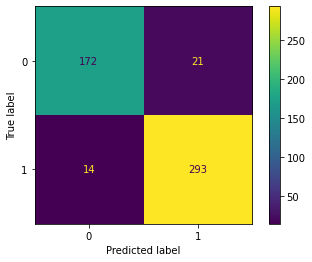

In [25]:
plot_confusion_matrix(log_model,scaled_X_test, y_test)

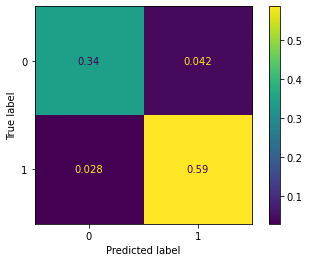

In [26]:
plot_confusion_matrix(log_model,scaled_X_test, y_test, normalize='all')

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
precision_score(y_test, y_pred)

0.9331210191082803

In [30]:
recall_score(y_test, y_pred)

0.9543973941368078

In [31]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

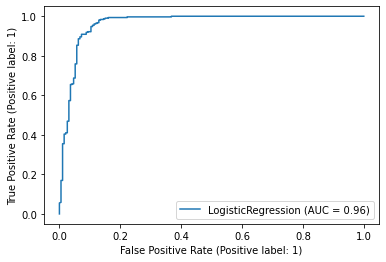

In [32]:
plot_roc_curve(log_model, scaled_X_test, y_test)

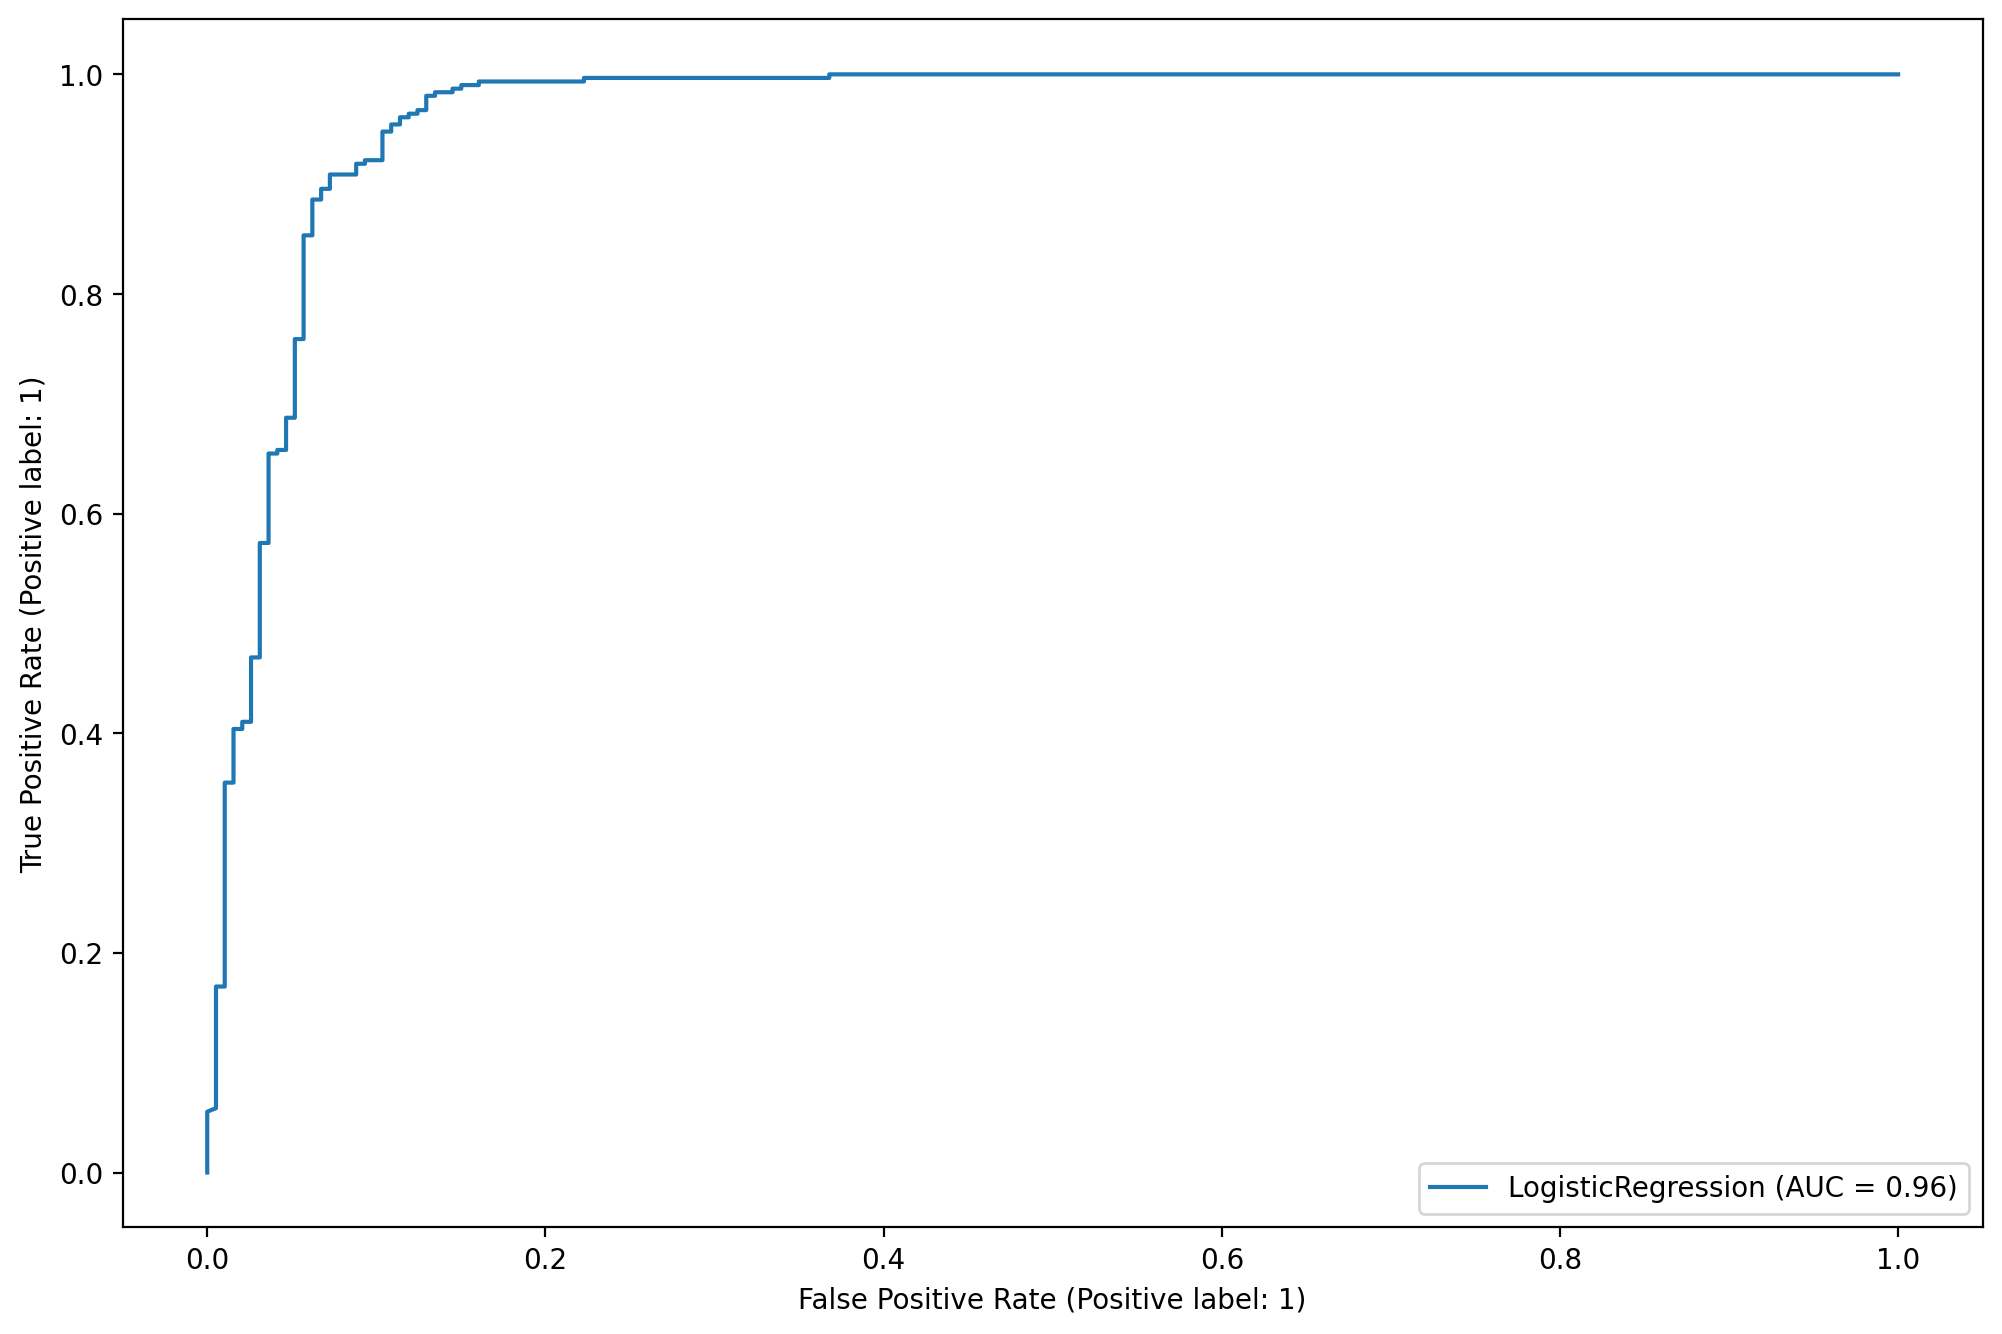

In [34]:
fig, ax =plt.subplots(figsize = (12,8), dpi = 200)
plot_roc_curve(log_model, scaled_X_test, y_test, ax = ax)

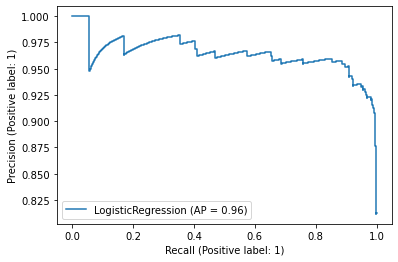

In [35]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

In [36]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [37]:
y_test[0]

1